<h1><center>Loan eligibility prediction</center></h1>
<center><img src="https://www.gvfinancebrokers.com.au/thumbnaillarge/Loan-Guidelines.jpg"></center>

### Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

%matplotlib inline

#Supressing warnings
import warnings
warnings.filterwarnings('ignore')



### Training dataset

In [2]:
# Creating Dataframes

training_set = pd.read_csv('https://raw.githubusercontent.com/musicnandpeace/Loan-Approval-eligibility/main/training_set.csv')
training_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Test Dataset

In [3]:
test_set = pd.read_csv('https://raw.githubusercontent.com/musicnandpeace/Loan-Approval-eligibility/main/test_set.csv')
test_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Initial Review of data- EDA

In [4]:
#Perform Exploratory Data Analysis of the training_set in just one line of code

pandas_profiling.ProfileReport(training_set)

In [5]:
training_set.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
training_set.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
test_set.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
training_set.shape

(614, 13)

In [9]:
test_set.shape

(367, 12)

In [10]:
training_set['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

### Inferences

1. There are 12 independent variables and 1 target label.
2. There are 3 types of data - object, int64 , float64.
3. The loan of 422(around 69%) people out of 614 were approved.
4. For categorical data:

   -80% of applicants in the dataset are male.
   
   -Around 65% of the applicants in the dataset are married.
   
   -Around 15% of applicants in the dataset are self-employed.
   
   -Around 85% of applicants have repaid their debts.
   
   
5. For independent variables (ordinal data):

    -Around 85% of applicants have repaid their debts.
    
    -Around 80% of the applicants are Graduate.
    
    -Most of the applicants are from the Semiurban area.

## Independent Variables (numerical data)

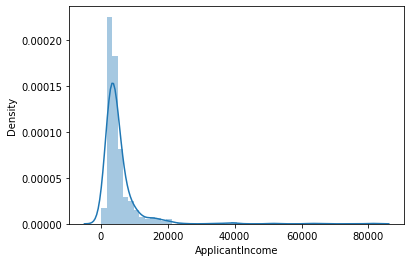

In [11]:
sns.distplot(training_set['ApplicantIncome'])
plt.show()

It is not a normal distribution and by looking at the long tail we can say there may be a lot of outliers. To confirm that, lets plot a boxplot.

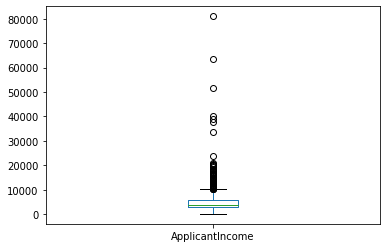

In [12]:
# generating a boxplot to plot outliers
training_set['ApplicantIncome'].plot.box()
plt.show()

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education.

The majority of co-applicants income ranges from 0 to 5000.

Text(0.5, 0.98, '')

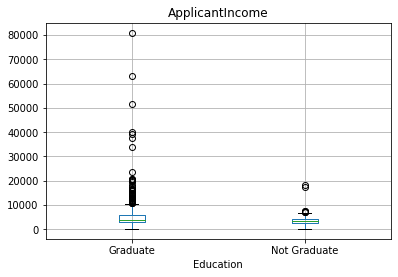

In [13]:
# Checking how the education level affects the applicant's income
training_set.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.suptitle('')

There are more outliers with graduated applicants with higher income.

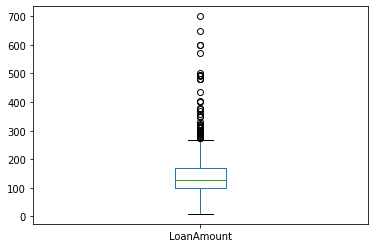

In [14]:
training_set['LoanAmount'].plot.box()
plt.show()

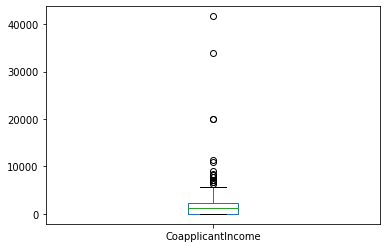

In [15]:
training_set['CoapplicantIncome'].plot.box()
plt.show()

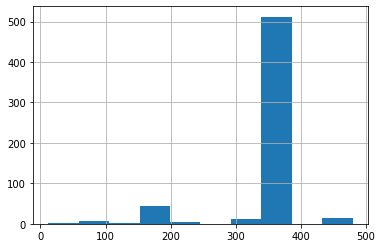

In [16]:
training_set['Loan_Amount_Term'].hist(bins = 10)
plt.show()

Almost 83% of the applicants took a loan for 360 days.

## Bivariate Analysis

In [17]:
#Segregating categorical and numerical columns
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

### Categorical Independent Variable vs Target Variable


In [18]:
#Segregating categorical and numerical columns
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

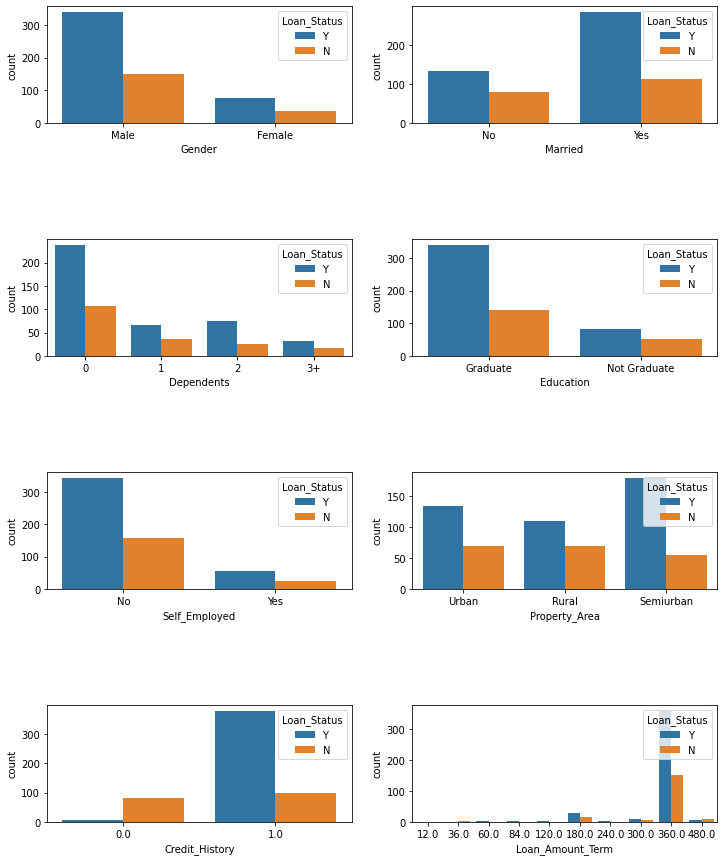

In [19]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=training_set,hue ='Loan_Status',ax=axes[row,col])
   
    

plt.subplots_adjust(hspace=1)

Plots above convey following things about the dataset:

Loan Approval Status: About 2/3rd of applicants have been granted loan.

Sex: There are more Men than Women (approx. 3x)

Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.

Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.

Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval

Employment: There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

Property Area: More applicants from Semi-urban and also likely to be granted loans.

Applicant with credit history are far more likely to be accepted.

Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).


### Numerical Independent Variable vs Target Variable

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


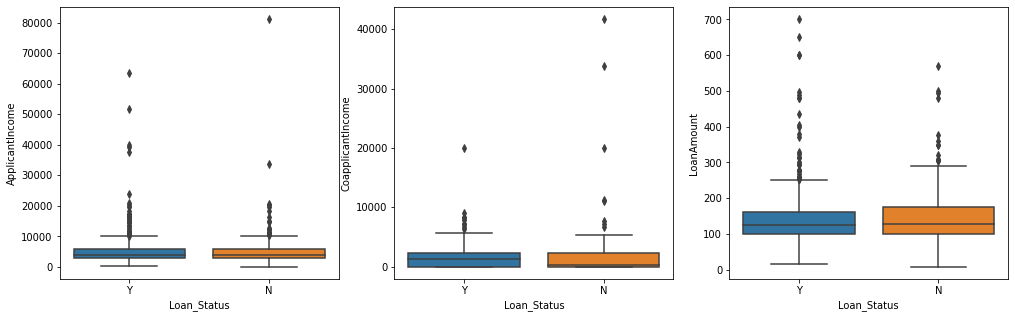

In [20]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col, data=training_set ,x='Loan_Status',ax=axes[idx])

print(training_set[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

1st plot shows that Applicant's income does not affect the chances of loan approval.

It shows that if co-applicants income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any co-applicant so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it. So, we can make a new variable in which we will combine the applicant’s and co-applicants income to visualize the combined effect of income on loan approval.
Let us combine the Applicant Income and Co-applicant Income and see the combined effect of Total Income on the Loan_Status.

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount.

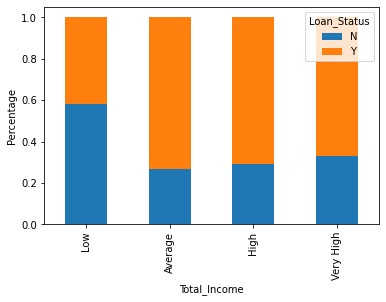

In [21]:
training_set['Total_Income'] = training_set['ApplicantIncome'] + training_set['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
training_set['Total_Income_bin'] = pd.cut(training_set['Total_Income'],bins,labels = group)
Total_Income_bin = pd.crosstab(training_set['Total_Income_bin'],training_set['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less compared to that of applicants with Average, High & Very High Income.

In [22]:
# Dropping Total_income column for now
training_set.drop('Total_Income', axis = 1, inplace= True)

## Heat map to visualize the correlation bw numerical variables

<AxesSubplot:>

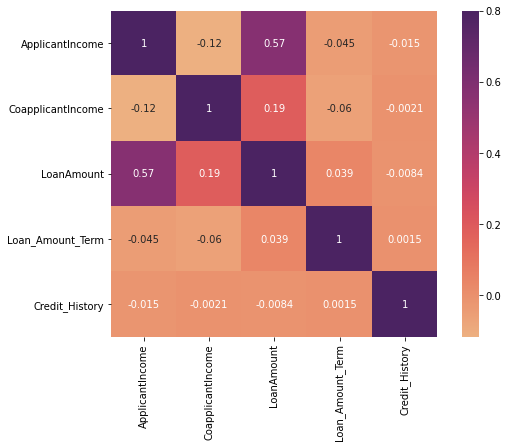

In [23]:
matrix = training_set.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='flare', annot = True)

There's high correlation between ApplicantIncome/CoapplicantIncome and LoanAmount

## Preprocessing Data:
Input data needs to be pre-processed before we feed it to model. Following things need to be taken care:
1. Encoding Categorical Features.
2. Imputing missing values

In [24]:
#### Encoding categrical Features: ##########
train_df_encoded = pd.get_dummies(training_set,drop_first=True)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Total_Income_bin_Average,Total_Income_bin_High,Total_Income_bin_Very High
0,5849,0.0,NaN,360.0,1.0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3000,0.0,66.0,360.0,1.0,0,1,0,0,0,...,0,0,0,1,0,1,1,1,0,0
3,2583,2358.0,120.0,360.0,1.0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,1,0
4,6000,0.0,141.0,360.0,1.0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0


In [25]:
########## Split Features and Target Varible ############
X = train_df_encoded.drop(columns='Loan_Status_Y')
y = train_df_encoded['Loan_Status_Y']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)
############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)


## Model 1: Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6879731721020665
Validation Mean Accuracy:  0.7352092352092352


#### Overfitting Problem
We can see from above metrics that Training Accuracy > Test Accuracy with default settings of Decision Tree classifier. Hence, model is overfit. We will try some Hyper-parameter tuning and see if it helps.

#### First let's try tuning 'Max_Depth' of tree

<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

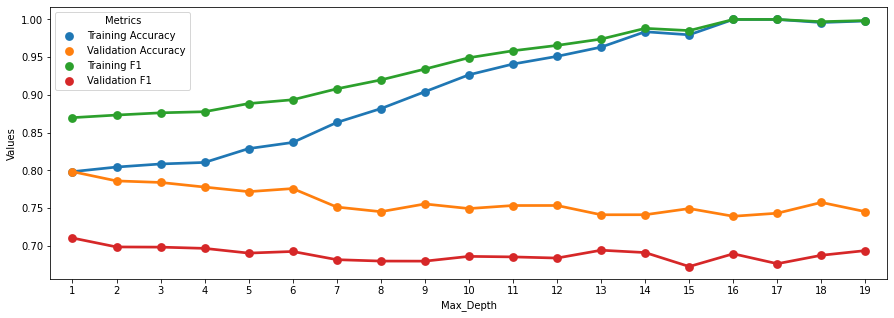

In [28]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)


From above graph, we can conclude that keeping 'Max_Depth' = 3 will yield optimum Test accuracy and F1 score
Optimum Test Accuracy ~ 0.805; Optimum F1 Score: ~0.7
#### Visulazing Decision Tree with Max Depth = 3

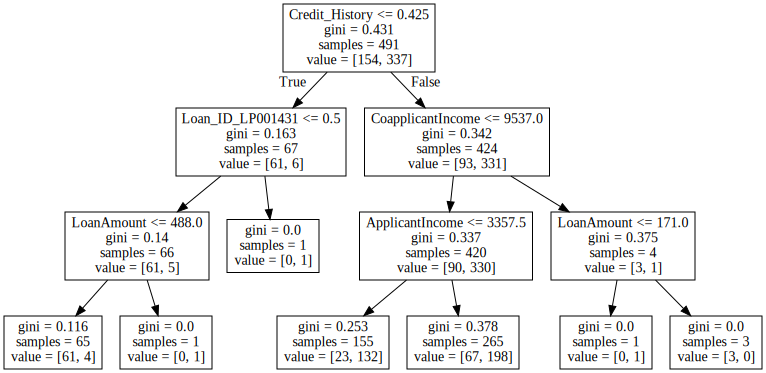

In [29]:
import graphviz 
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

From above tree, we could see that some of the leafs have less than 5 samples hence our classifier might overfit.
We can sweep hyper-parameter 'min_samples_leaf' to further improve test accuracy by keeping max_depth to 3

<AxesSubplot:xlabel='Min_Samples_leaf', ylabel='Values'>

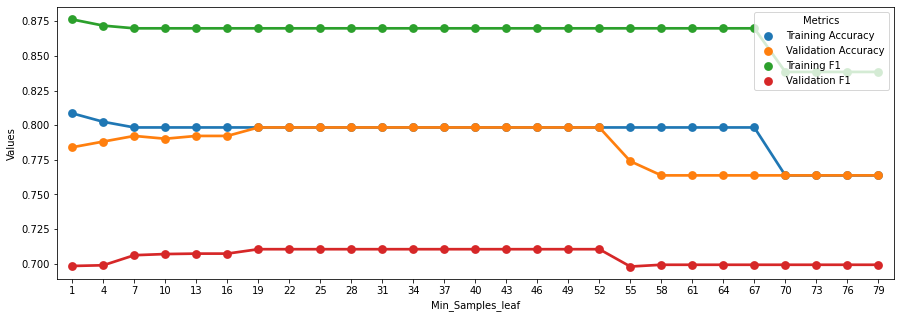

In [30]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,80,3): ### Sweeping from 1% samples to 10% samples per leaf 
    tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

From above plot, we will choose Min_Samples_leaf to 35 to improve test accuracy.

Let's use this Decision Tree classifier on unseen test data and evaluate Test Accuracy, F1 Score and Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8536585365853658
Test F1 Score:  0.903225806451613
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123


Mis-classifications
It can be seen that majority of the misclassifications are happening because of Loan Reject applicants being classified as Accept.

Let's look into Random Forest Classifier if it can reduce mis-classifications

### Model 2: Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8140096618357487
Train Accuracy  0.6863543788187373
Validation Mean F1 Score:  0.4070012002282401
Validation Mean Accuracy:  0.686353329210472


#### Random Forest: Test Data Evaluation

In [33]:
y_pred = rf_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.6910569105691057
Test F1 Score:  0.8173076923076924
Confusion Matrix on Test Data


Predicted,1,All
True,,
0,38,38
1,85,85
All,123,123


Random Forest gives same results as Decision Tree Classifier.
Finally, we will try Logistic Regression Model by sweeping threshold values.

### Model 3: Logistic Regression

<AxesSubplot:xlabel='Decision Threshold', ylabel='Values'>

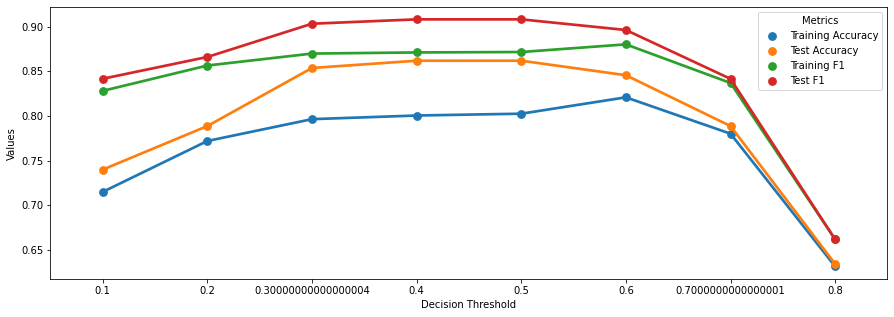

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

#for thresh in np.linspace(0.1,0.9,8): ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train,y_train)
    
    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

Logistic Regression does slightly better than Decision Tree and Random Forest.
<br> Based on the above Test/Train curves, we can keep threshold to 0.4. <br>
Now Finally let's look at Logistic Regression Confusion Matrix

In [35]:
thresh = 0.4 ### Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8617886178861789
Test F1 Score:  0.9081081081081082
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,22,16,38
1,1,84,85
All,23,100,123


Logistic Regression Confusion matrix is very similar to Decision Tree and Random Forest Classifier. In this analysis, we did extensive analysis of input data and were able to achieve Test Accuracy of 86 %